# Assignment 2

In this assignment, you will investigate the molecule ethylene in it's ground and excited state and will compare simulated absorption spectra approximated from excited-state energies to experimental values. 
You will be provided with a set of structures and with code to load the structures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import psi4
from ase.build import molecule
from ase.atoms import Atoms
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from psi4_helper import geom_ase_to_psi4

In [2]:
# get rotated structures

import ase.io

rotated_geoms = ase.io.read("Ethylene/C2H4_Scan_Rotation.db",":")
n_geoms_rot = len(rotated_geoms)

diss_geoms = ase.io.read("Ethylene/C2H4_BondScan.db",":")
n_geoms_diss = len(diss_geoms)

#read exp file

file = open("Ethylene/exp.dat","r")
x_exp = []
y_exp = []
for line in file:
    s=line.split()
    x_exp.append(float(s[0]))
    y_exp.append(float(s[1]))

## Task 1

1) Optimize an initial guess of ethylene at MP2/3-21G level of theory.

2) Take the optimized structure and compute 5 excited states at different levels of theory, i.e., CASSCF(e,o) and TDDFT or CCSD.
* Discuss the choice of your active space (number of electrons e and orbitals o) and the choice of functional/method. Discuss the differences you found in the simulations.
* Compare to your results to literature values and experimental values.
    
    
3) Take a look at the following normalized experimental absorption spectrum of ethylene in the gas phase and answer the following questions:
* How well do your excited-state energies compare to experiment? Plot the excited state energies with your chosen methods next to the exp. spectrum.
* What property do you need to get the correct absorption? 

Text(0.5, 1.0, 'Exp. spectrum from Ref. 1')

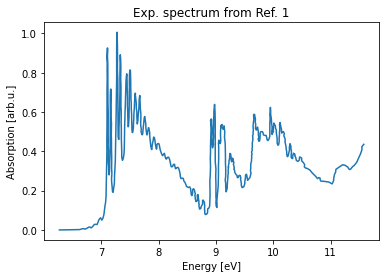

In [3]:
Nexp=1500
plt.plot(1/(np.array(x_exp)/10)*6.626*6.242*30,np.array(y_exp)/Nexp)
plt.xlabel("Energy [eV]")
plt.ylabel("Absorption [arb.u.]")
plt.title("Exp. spectrum from Ref. 1")

In [4]:
# SOLUTION TO BE REMOVED

#initiate geometry
geom_input = geom_ase_to_psi4(rotated_geoms[0], charge=0, multiplicity=1)
#initiate Psi4 molecule object
ethylene_guess = psi4.geometry(geom_input)
#optimize at mp2 level of theory
psi4.core.set_output_file('geometry_optimization.dat')

psi4.optimize('mp2/3-21G',mol=ethylene_guess)
print("\n* Geometry AFTER optimization...")
ethylene_opt=ethylene_guess.save_string_xyz()
print(ethylene_opt )

Optimizer: Optimization complete!

* Geometry AFTER optimization...
0 1
 C    0.670325317565    0.000006998145    0.000006028266
 C   -0.670323686950   -0.000018435032    0.000000846854
 H    1.243566297963    0.000029861536    0.921772376498
 H   -1.243605491360    0.000038231872    0.921794907585
 H   -1.243607324489    0.000040133003   -0.921812567996
 H    1.243627102438    0.000027950638   -0.921836576960



# Task 2: 

#### Questions to discuss:
* Do you think this is the correct result? What do you expect?
* Which method do you think would give qualitatively better results and why?

* triplet states along dissociation curve
* spin multiplicity needs to be changed
* they should see that they are degenerate

Methods to use:
* CASSCF, NEVPT2, CCSD, HF, MP2, DFT



Question: Which of the curves show a qualitatively correct behaviour? Which show
erratic behaviour? In order to do so, describe how the wavefunction compositions change.
Question: Discuss your results! Which methods are appropriate to describe the dissociation of H2
? In particular, discuss the problems of the RHF method and how it is overcome
in the UHF, CASSCF and NEVPT2 methods (Discuss static and dynamic correlation here as
3
well!). Also comment on why the CCSD method gives the best results of all methods in this
system. Would CCSD(T) further improve on the results? What else has to be considered in
order to obtain results comparable to the experimen

basis set convergence?
rotation curve

# References
1. Ethylene spektrum